In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')

In [7]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              1894 non-null   int64         
 1   환자ID                    1894 non-null   object        
 2   Large Lymphocyte        1894 non-null   float64       
 3   Location of herniation  1894 non-null   int64         
 4   ODI                     462 non-null    float64       
 5   가족력                     1843 non-null   float64       
 6   간질성폐질환                  1894 non-null   int64         
 7   고혈압여부                   1894 non-null   int64         
 8   과거수술횟수                  1894 non-null   int64         
 9   당뇨여부                    1894 non-null   int64         
 10  말초동맥질환여부                1894 non-null   int64         
 11  빈혈여부                    1894 non-null   int64         
 12  성별                      1894 non-null   int64   

In [4]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [8]:
df_ROS['입원일자_datetime'] = pd.to_datetime(df_ROS['입원일자'].astype(str))
df_ROS['입원일자_datetime_day_name'] = df_ROS['입원일자_datetime'].dt.day_name()
df_ROS['퇴원일자_datetime'] = pd.to_datetime(df_ROS['퇴원일자'].astype(str))
df_ROS['퇴원일자_datetime_day_name'] = df_ROS['퇴원일자_datetime'].dt.day_name()

In [12]:
df_ROS.describe(datetime_is_numeric=True)

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추전방위증,입원일자_datetime,퇴원일자_datetime
count,1894.000000,1894.000000,1894.000000,462.000000,1843.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,...,1890.000000,1890.000000,1893.000000,1894.000000,998.000000,1893.000000,1894.000000,1894.000000,1894,1894
mean,946.500000,39.270750,2.295671,31.142857,0.049919,0.020063,0.130940,0.302534,0.062830,0.004224,...,46.593651,16.329841,15.287934,0.056494,-1.507325,1989.788774,4.430834,0.032207,2016-05-29 16:20:46.884899584,2016-05-20 19:11:50.876452096
min,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.900000,-10.600000,-27.400000,0.000000,-2.840000,1145.800000,1.000000,0.000000,2009-01-20 00:00:00,2009-01-24 00:00:00
25%,473.250000,30.700000,1.000000,24.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.700000,10.500000,8.800000,0.000000,-1.820000,1777.000000,4.000000,0.000000,2012-11-05 06:00:00,2012-10-12 12:00:00
50%,946.500000,40.200000,2.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.100000,15.700000,14.500000,0.000000,-1.520000,1985.500000,4.000000,0.000000,2018-12-31 00:00:00,2019-01-03 00:00:00
75%,1419.750000,48.600000,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52.000000,21.400000,21.100000,0.000000,-1.202500,2178.500000,4.000000,0.000000,2019-06-23 00:00:00,2019-06-25 00:00:00
max,1893.000000,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,559.000000,48.700000,165.000000,1.000000,1.700000,3214.200000,45.000000,1.000000,2020-08-04 00:00:00,2020-08-07 00:00:00
std,546.895023,13.675874,0.996143,10.131304,0.217836,0.140254,0.337424,0.638461,0.242721,0.064871,...,22.736211,8.421322,10.426397,0.230935,0.495867,314.478436,3.595680,0.176596,NaN,NaN


In [37]:
# pd.pivot_table(data=df_ROS[['퇴원일자_datetime_day_name', '환자ID']], index='퇴원일자_datetime_day_name', aggfunc=len).plot(kind='bar')
pd.pivot_table(data=df_ROS[['퇴원일자_datetime_day_name', '환자ID']], index='퇴원일자_datetime_day_name', aggfunc=len)

,환자ID
퇴원일자_datetime_day_name,
Friday,332
Monday,184
Saturday,301
Sunday,121
Thursday,329
Tuesday,279
Wednesday,348


C:\Users\05-16\AppData\Local\Temp\ipykernel_3288\1463180236.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.week


<AxesSubplot:xlabel='입원일자_datetime_week'>

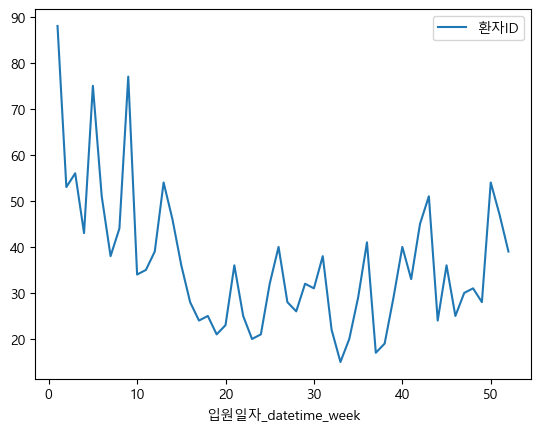

In [27]:
df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.week
pd.pivot_table(data=df_ROS[['입원일자_datetime_week', '환자ID']], index='입원일자_datetime_week', aggfunc=len).plot(kind='line')

In [28]:
df_ROS_pivot = pd.pivot_table(data=df_ROS[['입원일자_datetime_week', '환자ID']], index='입원일자_datetime_week', aggfunc=len)
#df_ROS_pivot

,환자ID
입원일자_datetime_week,
1,88
2,53
3,56
4,43
5,75
6,51
7,38
8,44
9,77


In [30]:
df_ROS_pivot['new'] = df_ROS_pivot.index

In [31]:
df_ROS_pivot

,환자ID,new
입원일자_datetime_week,,
1,88,1
2,53,2
3,56,3
4,43,4
5,75,5
6,51,6
7,38,7
8,44,8
9,77,9


In [6]:
# df_ROS.info()
df_ROS = df_ROS[['성별','신장', '심혈관질환','체중','흡연여부', '연령', '직업', '혈액형', '재발여부']]

In [11]:
df_ROS.head(3)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0


In [8]:
df_ROS.tail(4)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1890,2,157,0,59.0,0,42,사무직,RH+B,0
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0
